Import the cleaned dataset

In [2]:
import pandas as pd

# Load your cleaned dataset
file_path = "../../data/processed/cleaned_properties.csv"
df = pd.read_csv(file_path)


Show columns, Dtypes, and variable types

In [3]:
# Show dtypes
print("\nDtypes:")
print(df.dtypes)

# Detect variable types
binary_cols = [col for col in df.columns if df[col].dropna().isin([0,1]).all()]
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

# Remove binary from numeric category
continuous_numeric = [col for col in numeric_cols if col not in binary_cols and col != "id"]

print("\nDetected:")
print("Binary:", binary_cols)
print("Continuous numeric:", continuous_numeric)
print("Categorical:", categorical_cols)


Dtypes:
id                                  int64
price                             float64
property_type                      object
subproperty_type                   object
region                             object
province                           object
locality                           object
zip_code                            int64
latitude                          float64
longitude                         float64
construction_year                 float64
total_area_sqm                    float64
surface_land_sqm                  float64
nbr_frontages                     float64
nbr_bedrooms                      float64
equipped_kitchen                   object
fl_furnished                        int64
fl_open_fire                        int64
fl_terrace                          int64
terrace_sqm                       float64
fl_garden                           int64
garden_sqm                        float64
fl_swimming_pool                    int64
fl_floodzone             

Checking if nbr of bedrooms or frontages have missing values. 
I may want to change their format from float64 to int64, if possible.

In [4]:
print("Missing values:")
print(df[["nbr_bedrooms", "nbr_frontages"]].isna().sum())

Missing values:
nbr_bedrooms         0
nbr_frontages    26346
dtype: int64


So next I will update the data as follows:
- nbr_bedrooms to become int64
- nbr_frontages to become Int64 (NOTE THE CAPITAL I)
- zip_code to categorical or object

I will save the new dataset as v2 in the processed data folder

In [5]:
# Bedrooms → true integers (no missing values)
df["nbr_bedrooms"] = df["nbr_bedrooms"].astype("int64")

# Frontages → nullable integer (because missing values exist)
df["nbr_frontages"] = df["nbr_frontages"].astype("Int64")

# Zip → categorical (not numeric)
df["zip_code"] = df["zip_code"].astype("category")

output_path = "../../data/processed/cleaned_properties_v2.csv"
df.to_csv(output_path, index=False)

print("Updated cleaned dataset saved as:", output_path)

Updated cleaned dataset saved as: ../../data/processed/cleaned_properties_v2.csv


Re-run previous code on this newly cleaned dataset

In [6]:
df = pd.read_csv("../../data/processed/cleaned_properties_v2.csv")

# Show dtypes
print("\nDtypes:")
print(df.dtypes)

# Detect variable types
binary_cols = [col for col in df.columns if df[col].dropna().isin([0,1]).all()]
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

# Remove binary from numeric category
continuous_numeric = [col for col in numeric_cols if col not in binary_cols and col != "id"]

print("\nDetected:")
print("Binary:", binary_cols)
print("Continuous numeric:", continuous_numeric)
print("Categorical:", categorical_cols)


Dtypes:
id                                  int64
price                             float64
property_type                      object
subproperty_type                   object
region                             object
province                           object
locality                           object
zip_code                            int64
latitude                          float64
longitude                         float64
construction_year                 float64
total_area_sqm                    float64
surface_land_sqm                  float64
nbr_frontages                     float64
nbr_bedrooms                        int64
equipped_kitchen                   object
fl_furnished                        int64
fl_open_fire                        int64
fl_terrace                          int64
terrace_sqm                       float64
fl_garden                           int64
garden_sqm                        float64
fl_swimming_pool                    int64
fl_floodzone             

Trying again in a different way as the above did not work:
- for nbr_bedrooms it correctly updated to int64
- for nbr_frontages it remained float64, while we wanted to convert it to Int64
- for zip_code, it remained int64, while we wanted it to become object

In [10]:
# Convert correctly after reading
df["nbr_bedrooms"] = df["nbr_bedrooms"].astype("int64")      # no NaNs
df["nbr_frontages"] = df["nbr_frontages"].astype("Int64")    # has NaNs

# Convert zip_code to string to force object type
df["zip_code"] = df["zip_code"].astype(str)

# Save
df.to_parquet("../../data/processed/cleaned_properties_v3.parquet", index=False)

# Load
df = pd.read_parquet("../../data/processed/cleaned_properties_v3.parquet")

# Show dtypes
print("\nDtypes:")
print(df.dtypes)

# Detect variable types
binary_cols = [col for col in df.columns if df[col].dropna().isin([0,1]).all()]
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

# Remove binary from numeric category
continuous_numeric = [col for col in numeric_cols if col not in binary_cols and col != "id"]

print("\nDetected:")
print("Binary:", binary_cols)
print("Continuous numeric:", continuous_numeric)
print("Categorical:", categorical_cols)


Dtypes:
id                                  int64
price                             float64
property_type                      object
subproperty_type                   object
region                             object
province                           object
locality                           object
zip_code                           object
latitude                          float64
longitude                         float64
construction_year                 float64
total_area_sqm                    float64
surface_land_sqm                  float64
nbr_frontages                       Int64
nbr_bedrooms                        int64
equipped_kitchen                   object
fl_furnished                        int64
fl_open_fire                        int64
fl_terrace                          int64
terrace_sqm                       float64
fl_garden                           int64
garden_sqm                        float64
fl_swimming_pool                    int64
fl_floodzone             

Target variable is price
We want to understand its distribution

count    7.550800e+04
mean     4.227730e+05
std      4.383664e+05
min      7.600000e+04
25%      2.420000e+05
50%      3.290000e+05
75%      4.550000e+05
max      2.250000e+07
Name: price, dtype: float64


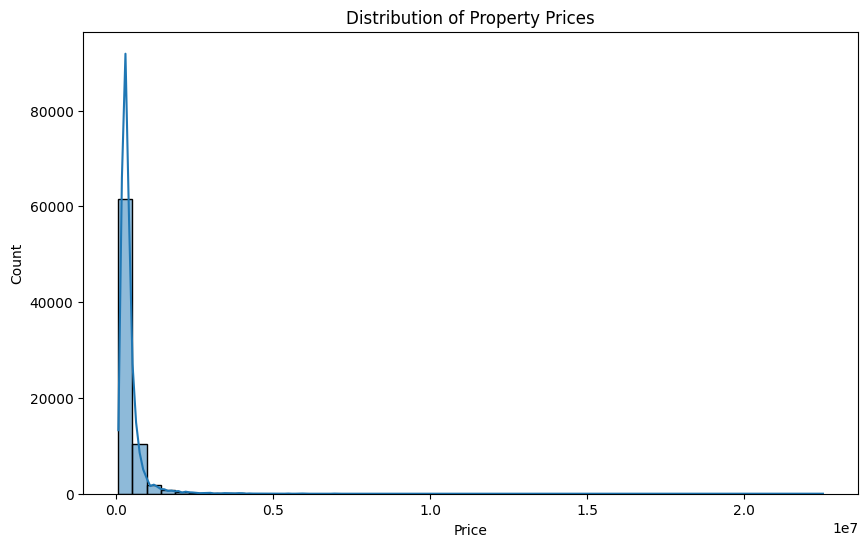

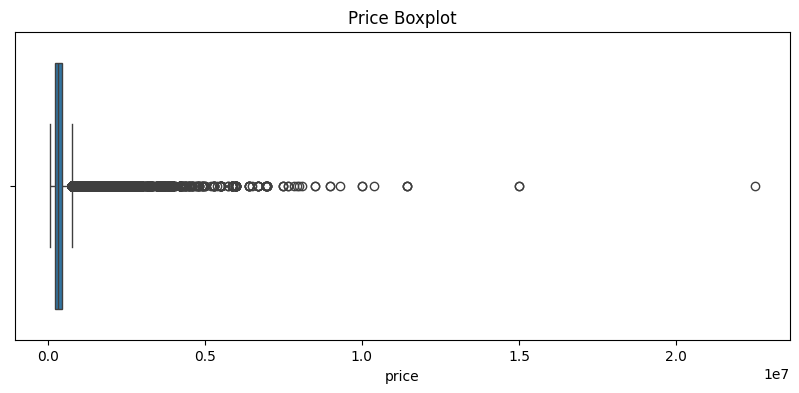

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary stats
print(df["price"].describe())

# Histogram
plt.figure(figsize=(10,6))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Distribution of Property Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

# Boxplot (to spot outliers)
plt.figure(figsize=(10,4))
sns.boxplot(x=df["price"])
plt.title("Price Boxplot")
plt.show()


With price highly right-skewed, we will log-transform price first
This will:
- Reduce impact of extreme high values on correlation
- Make plots more interpretable
- Highlight linear relationships better

log_price                         1.000000
price                             0.793051
nbr_bedrooms                      0.374293
latitude                          0.229561
nbr_frontages                     0.223887
total_area_sqm                    0.179189
terrace_sqm                       0.135634
surface_land_sqm                  0.129642
garden_sqm                        0.085448
construction_year                 0.039248
cadastral_income                  0.001332
primary_energy_consumption_sqm   -0.000142
longitude                        -0.095606
Name: log_price, dtype: float64


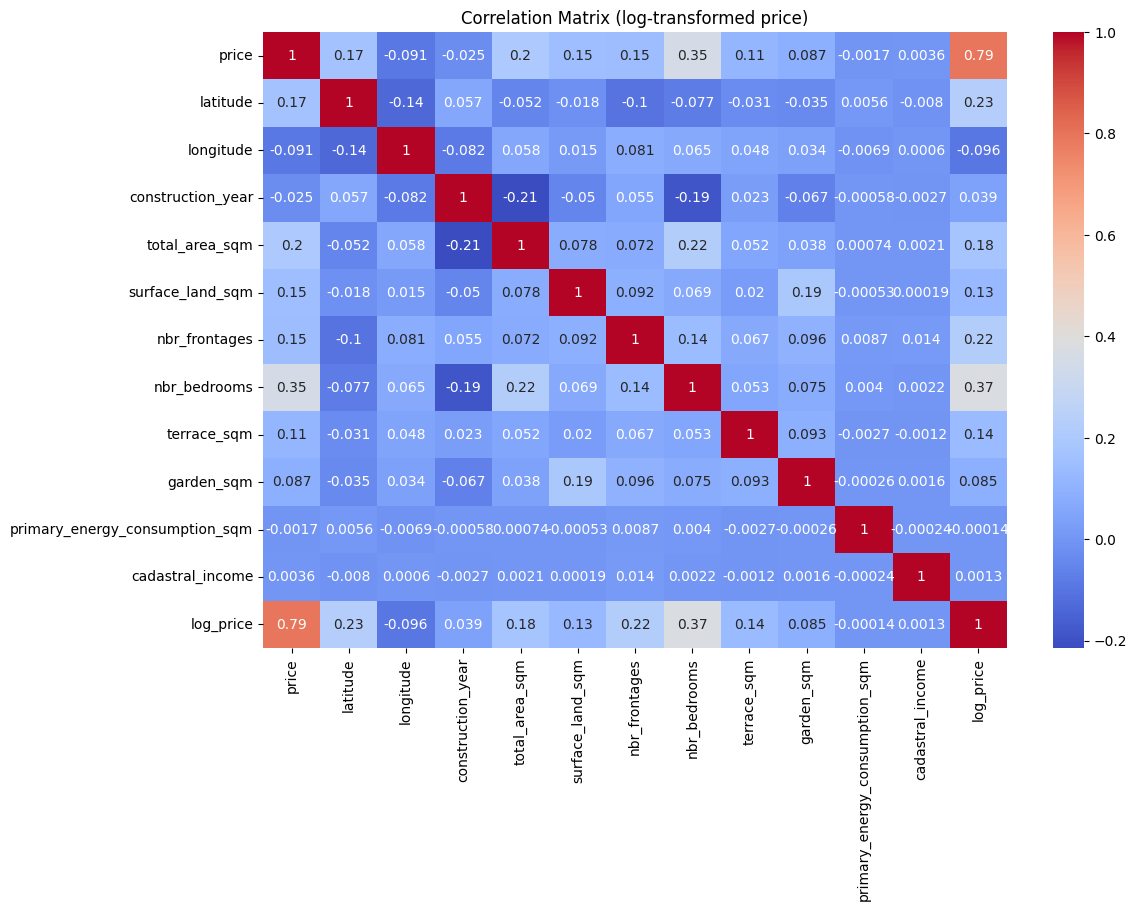

In [12]:
import numpy as np

# Add a log-transformed price column
df["log_price"] = np.log1p(df["price"])  # log(1 + price) to handle zeros if any

# Numeric correlations with log_price
numeric_features = continuous_numeric
correlation = df[numeric_features + ["log_price"]].corr()["log_price"].sort_values(ascending=False)
print(correlation)

# Heatmap for numeric correlations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_features + ["log_price"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (log-transformed price)")
plt.show()


Now we want to explore price vs binary features

In [ ]:
binary_features = [
    'fl_furnished',
    'fl_open_fire',
    'fl_terrace',
    'fl_garden',
    'fl_swimming_pool',
    'fl_floodzone',
    'fl_double_glazing'
]

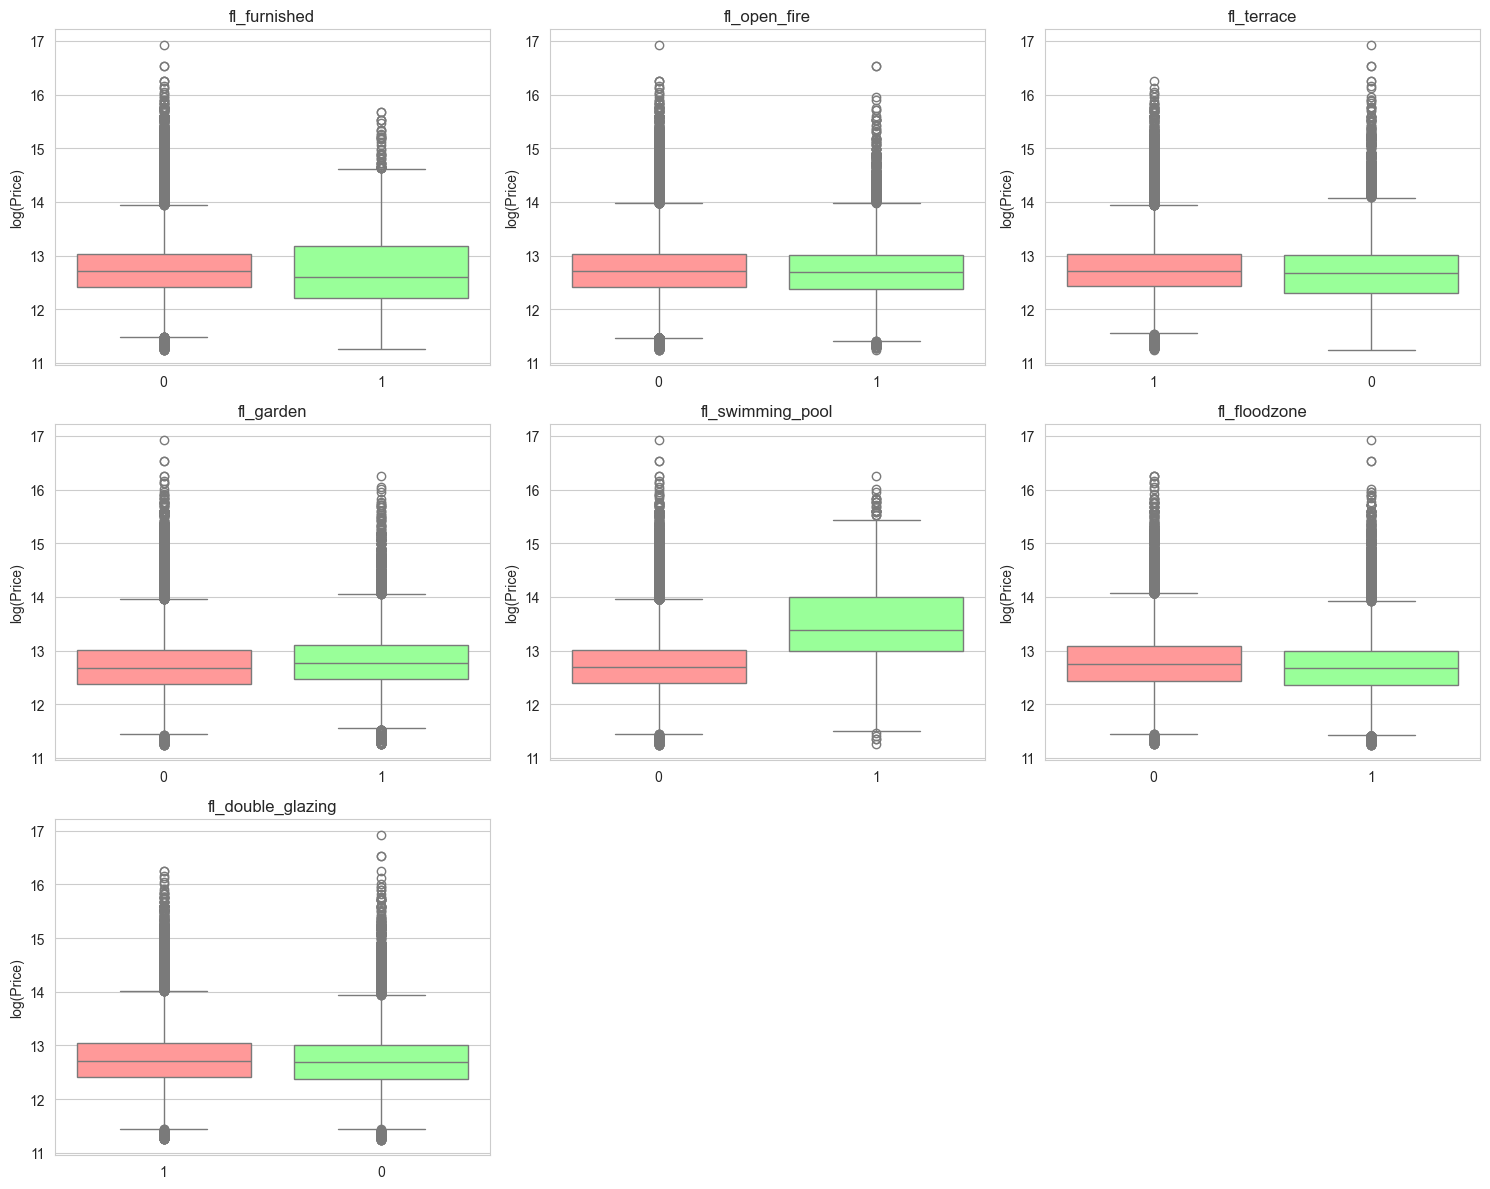

In [24]:
sns.set_style("whitegrid")

# Map 0/1 to colors
color_map = {0: "#FF9999", 1: "#99FF99"}

n_cols = 3
n_rows = (len(binary_features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(binary_features):
    # Plot without palette
    box = sns.boxplot(
        x=df[col].astype(str),
        y=df["log_price"],
        ax=axes[i],
        color="#CCCCCC"  # temporary neutral
    )

    # After plotting, recolor boxes manually
    for patch, tick_label in zip(box.patches, sorted(df[col].dropna().unique())):
        patch.set_facecolor(color_map[tick_label])

    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("log(Price)")

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


We still need to handle outliers to make the result above more clear
- prices are highly skewed
- extreme outliers make it hard to see the main trend in plots
- log-transform already helped reduce skew, but very extreme values may still dominate

Let's filter at 99th percentile
Also forcing the visuals to always show 0 on the left and 1 on the right

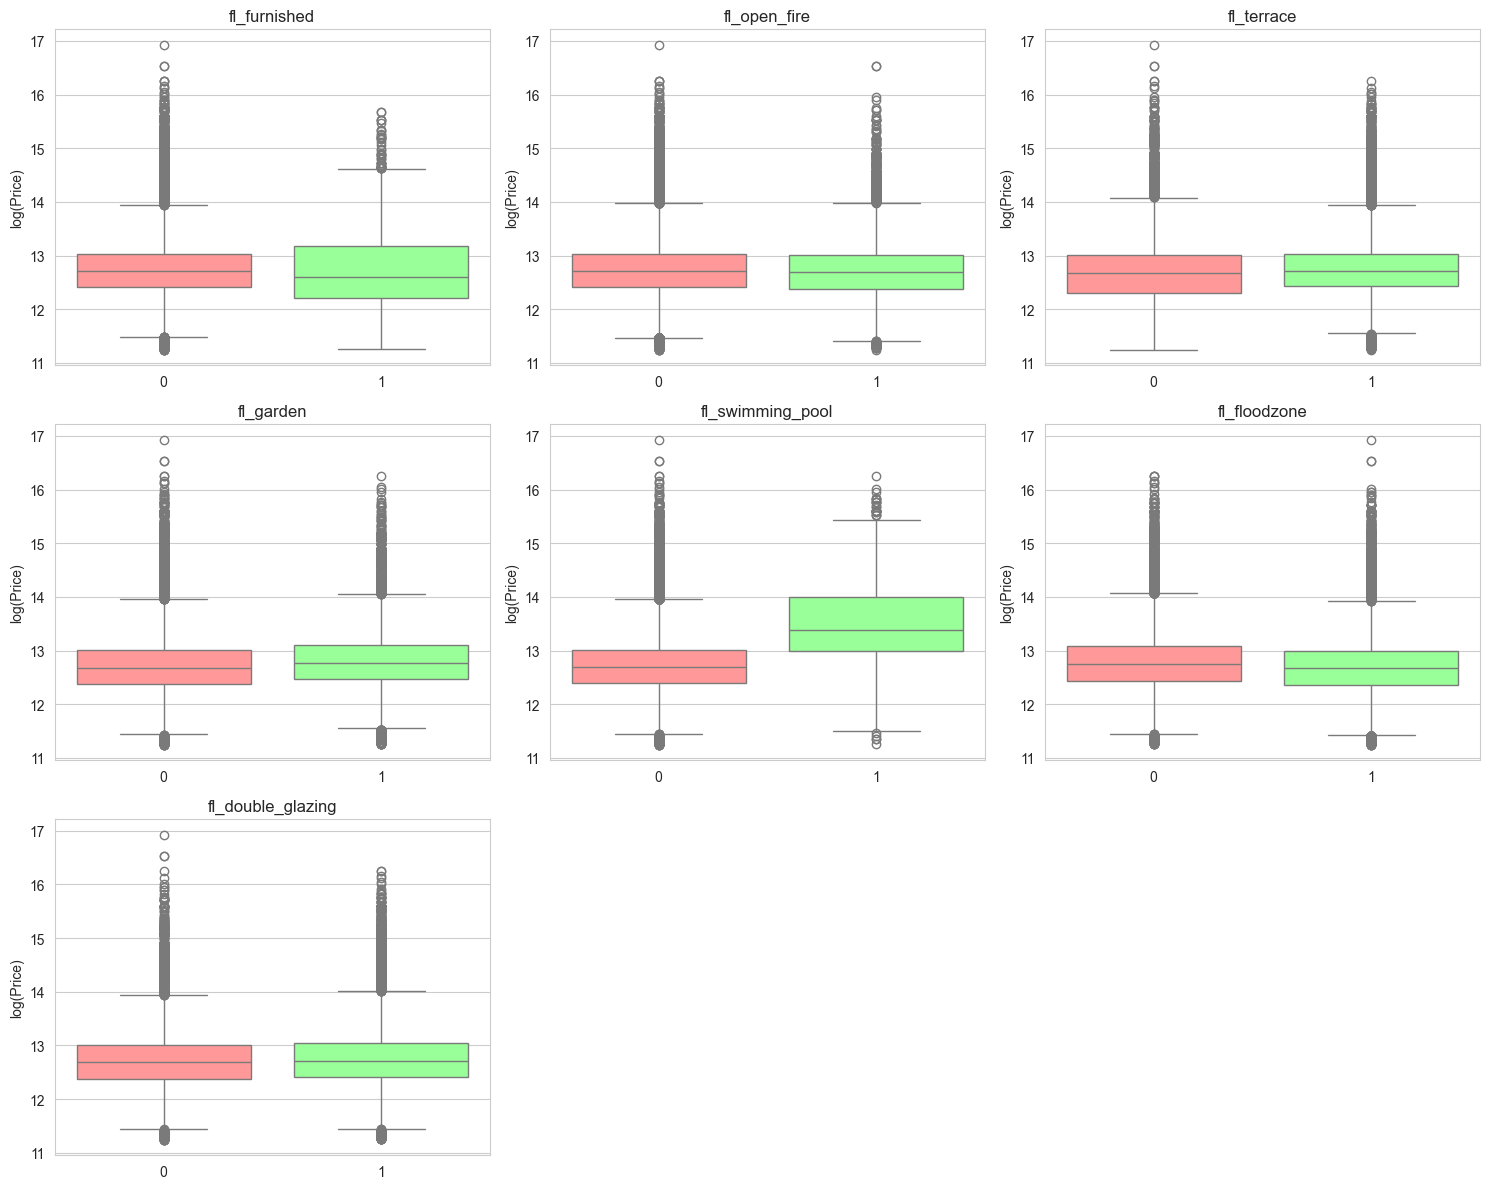

In [ ]:
price_99 = df['price'].quantile(0.99)
df_vis = df[df['price'] <= price_99]

sns.set_style("whitegrid")

# Map 0/1 to colors
color_map = {0: "#FF9999", 1: "#99FF99"}

n_cols = 3
n_rows = (len(binary_features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(binary_features):
    # Plot without palette, force 0 on left, 1 on right
    box = sns.boxplot(
        x=df[col].astype(str),
        y=df["log_price"],
        ax=axes[i],
        color="#CCCCCC",  # temporary neutral
        order=["0", "1"]  # ensures 0 left, 1 right
    )

    # Recolor boxes manually
    for patch, tick_label in zip(box.patches, ["0", "1"]):
        patch.set_facecolor(color_map[int(tick_label)])

    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("log(Price)")

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

99th percentile did not influence these visuals much
Representing these visuals in numbers

In [35]:
# Initialize a list to store results
summary_list = []

for col in binary_features:
    medians = df_vis.groupby(col)['log_price'].median()
    median_0 = medians.get(0, float('nan'))
    median_1 = medians.get(1, float('nan'))
    diff = median_1 - median_0
    summary_list.append({
        "Feature": col,
        "Median (0)": median_0,
        "Median (1)": median_1,
        "Difference (1-0)": diff
    })

# Convert to DataFrame
binary_summary = pd.DataFrame(summary_list)

# Sort by absolute difference for easier interpretation
binary_summary = binary_summary.reindex(binary_summary['Difference (1-0)'].abs().sort_values(ascending=False).index)

# Display
print(binary_summary)

             Feature  Median (0)  Median (1)  Difference (1-0)
4   fl_swimming_pool   12.691584   13.303019          0.611435
0       fl_furnished   12.694656   12.574185         -0.120470
3          fl_garden   12.675767   12.765691          0.089924
5       fl_floodzone   12.735232   12.662921         -0.072311
2         fl_terrace   12.673084   12.706851          0.033767
1       fl_open_fire   12.698544   12.684602         -0.013942
6  fl_double_glazing   12.691584   12.700772          0.009188


sorting this by influence on the price

In [36]:
# Compute median differences (you may already have binary_summary)
binary_summary['Abs_Diff'] = binary_summary['Difference (1-0)'].abs()

# Sort by absolute difference descending
binary_summary_sorted = binary_summary.sort_values(by='Abs_Diff', ascending=False)

# Drop the helper column if you like
binary_summary_sorted = binary_summary_sorted.drop(columns='Abs_Diff')

# Display
print(binary_summary_sorted)


             Feature  Median (0)  Median (1)  Difference (1-0)
4   fl_swimming_pool   12.691584   13.303019          0.611435
0       fl_furnished   12.694656   12.574185         -0.120470
3          fl_garden   12.675767   12.765691          0.089924
5       fl_floodzone   12.735232   12.662921         -0.072311
2         fl_terrace   12.673084   12.706851          0.033767
1       fl_open_fire   12.698544   12.684602         -0.013942
6  fl_double_glazing   12.691584   12.700772          0.009188


# INTERPRETATION
Influence of binary feature effects on price:

### 1. `fl_swimming_pool`

* Difference (1–0): 0.611 → very large effect
* Properties with a pool are significantly more expensive; median price increases roughly 84% when exponentiated. This is the strongest influencer among the binaries

### 2. `fl_furnished`

* Difference: -0.120 → slight negative effect
* Furnished properties show slightly lower median price (~−11% in actual price). This could be context-specific, e.g., small furnished apartments

### 3. `fl_garden`

* Difference: 0.090 → small positive effect
* Having a garden raises median price by about 9%, a modest but meaningful increase

### 4. `fl_floodzone`

* Difference: -0.072 → small negative effect
* Properties in a flood zone are slightly less expensive (~−7%), as expected

### 5. `fl_terrace`

* Difference: 0.034 → very minor positive effect (~3%)
* Terrace presence has little influence on median price

### 6. `fl_open_fire`

* Difference: -0.014 → negligible effect (~1%)
* Fireplaces do not meaningfully impact price

### 7. `fl_double_glazing`

* Difference: 0.009 → essentially zero effect (~1%)
* Double glazing has almost no observable influence on median price

### ✅ Summary

* Strong effect: `fl_swimming_pool`
* Moderate effect: `fl_garden`, `fl_floodzone`
* Weak or negligible: `fl_terrace`, `fl_furnished`, `fl_open_fire`, `fl_double_glazing`

Let's look at the correlation with binary variables using point-biserial correlation now

In [37]:
from scipy.stats import pointbiserialr

# Initialize list for results
pb_corr_list = []

for col in binary_features:
    corr, p_value = pointbiserialr(df_vis[col], df_vis['log_price'])
    pb_corr_list.append({
        "Feature": col,
        "Point-Biserial Corr": corr,
        "p-value": p_value
    })

# Convert to DataFrame and sort by absolute correlation
pb_corr_df = pd.DataFrame(pb_corr_list)
pb_corr_df = pb_corr_df.reindex(pb_corr_df['Point-Biserial Corr'].abs().sort_values(ascending=False).index)

print(pb_corr_df)


             Feature  Point-Biserial Corr        p-value
4   fl_swimming_pool             0.146572   0.000000e+00
5       fl_floodzone            -0.087571  3.512323e-127
2         fl_terrace             0.073652   1.957976e-90
3          fl_garden             0.068435   2.618893e-78
6  fl_double_glazing             0.031776   3.603613e-18
1       fl_open_fire            -0.012403   6.955757e-04
0       fl_furnished            -0.010527   3.997443e-03


# INTERPRETATION

Swimming pool is clearly the most influential binary feature on price
This is confirmed both visually (boxplots) and numerically (point-biserial)

Flood zone, garden, terrace show minor but meaningful effects

Double glazing, fireplace, furnished have negligible impact on price

All correlations are statistically significant (tiny p-values) due to large sample size, but the effect size matters more for interpretation

Next we'll look at the discrete numeric features (nbrs)

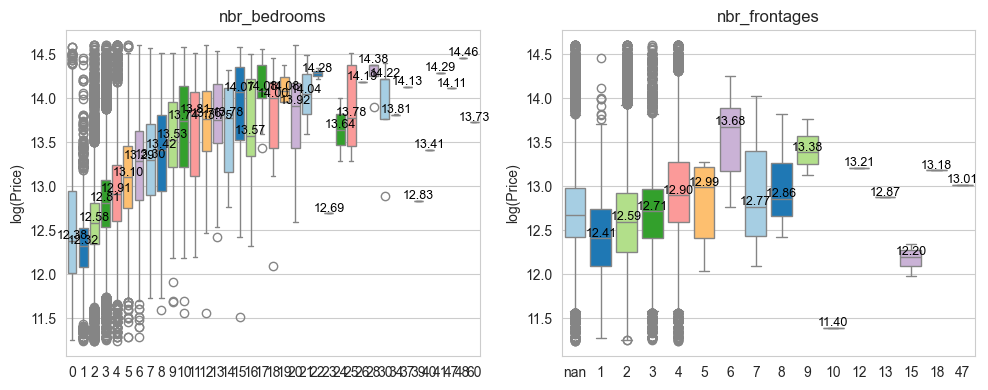

In [ ]:
discrete_features = ['nbr_bedrooms', 'nbr_frontages']

n_cols = 2
n_rows = (len(discrete_features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

# Define pastel colors to cycle through
pastel_colors = ["#A6CEE3", "#1F78B4", "#B2DF8A", "#33A02C", "#FB9A99", "#FDBF6F", "#CAB2D6"]

# Make a copy explicitly to avoid SettingWithCopyWarning
df_vis_plot = df_vis.copy()

for i, col in enumerate(discrete_features):
    # Convert to string for plotting, replace <NA> with 'nan'
    df_vis_plot[col + '_str'] = df_vis_plot[col].astype(str).replace('<NA>', 'nan')
    
    # Determine order: 'nan' first if present, then sorted numerics
    unique_vals = df_vis_plot[col + '_str'].unique().tolist()
    numeric_vals = [v for v in unique_vals if v != 'nan']
    numeric_vals.sort(key=lambda x: float(x))
    plot_order = ['nan'] + numeric_vals if 'nan' in unique_vals else numeric_vals
    
    # Draw boxplot in neutral color first
    box = sns.boxplot(
        x=df_vis_plot[col + '_str'],
        y=df_vis_plot['log_price'],
        ax=axes[i],
        order=plot_order,
        color="#DDDDDD"
    )
    
    # Recolor each box manually
    for j, patch in enumerate(box.patches):
        patch.set_facecolor(pastel_colors[j % len(pastel_colors)])
    
    # Annotate median on top of each box
    medians = df_vis_plot.groupby(col)['log_price'].median()
    for j, val in enumerate(plot_order):
        if val == 'nan':
            med = medians.get(np.nan, np.nan)
        else:
            med = medians.get(int(val), np.nan)
        if not np.isnan(med):
            axes[i].text(j, med + 0.02, f"{med:.2f}", ha='center', color='black', fontsize=9)
    
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("log(Price)")

# Remove empty axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

And numerically

In [41]:
discrete_features = ['nbr_bedrooms', 'nbr_frontages']

summary_list = []

for col in discrete_features:
    # Get medians per category
    medians = df_vis.groupby(col)['log_price'].median()
    counts = df_vis[col].value_counts(dropna=False)  # include NA
    
    for val in counts.index:
        median_val = medians.get(val, np.nan)
        summary_list.append({
            'Feature': col,
            'Category': val,
            'Median(log_price)': median_val,
            'Count': counts[val]
        })

summary_df = pd.DataFrame(summary_list)

# Optional: sort by Feature, then by Category
summary_df = summary_df.sort_values(['Feature', 'Category']).reset_index(drop=True)

print(summary_df)


          Feature Category  Median(log_price)  Count
0    nbr_bedrooms        0          12.384223   2044
1    nbr_bedrooms        1          12.323860   8095
2    nbr_bedrooms        2          12.584513  24352
3    nbr_bedrooms        3          12.807655  24952
4    nbr_bedrooms        4          12.911645   9384
5    nbr_bedrooms        5          13.100612   3296
6    nbr_bedrooms        6          13.292438   1340
7    nbr_bedrooms        7          13.296318    480
8    nbr_bedrooms        8          13.415034    345
9    nbr_bedrooms        9          13.527830    126
10   nbr_bedrooms       10          13.742926    122
11   nbr_bedrooms       11          13.810499     37
12   nbr_bedrooms       12          13.764218     44
13   nbr_bedrooms       13          13.748303     23
14   nbr_bedrooms       14          13.775394     22
15   nbr_bedrooms       15          14.065520     24
16   nbr_bedrooms       16          13.573440     19
17   nbr_bedrooms       17          14.077106 

# INTERPRETATION

### 1. General trends for `nbr_bedrooms`

* Median log-price increases with number of bedrooms, roughly linearly for the bulk of the data:
  * 1 bedroom → 12.32
  * 2 bedrooms → 12.58
  * 3 bedrooms → 12.81
  * 4 bedrooms → 12.91
  * 5 bedrooms → 13.10
* This shows a clear positive effect on price as bedroom count increases
* For very high bedroom counts (10+), medians jump a lot, but counts are very small (often <10). These are outliers, so the effect is less reliable for those
** Conclusion: For the majority of properties, more bedrooms → higher price

### 2. General trends for `nbr_frontages`

* Most properties have 2–4 frontages, and median log-price increases with frontages:
  * 2 frontages → 12.59
  * 3 frontages → 12.71
  * 4 frontages → 12.90
* Very few properties have extreme numbers of frontages (5+), so the medians there are not very meaningful due to low counts.
* Note the `<NA>` category (26188 properties) → median is `NaN`. These should be handled carefully in interpretation
** Conclusion: More frontages are generally associated with higher prices, but the effect is less pronounced and many missing values exist

### 3. Effect sizes

* If you compute the difference between categories, e.g., 1 vs 2 bedrooms or 2 vs 3 bedrooms, you can see the approximate “impact” in log-price units:
  * 2 vs 1 bedrooms → 12.58 − 12.32 ≈ 0.26
  * 3 vs 2 bedrooms → 12.81 − 12.58 ≈ 0.23
* These differences are relatively consistent for the main range (1–6 bedrooms)

* For frontages:
  * 3 vs 2 → 12.71 − 12.59 ≈ 0.12
  * 4 vs 3 → 12.90 − 12.71 ≈ 0.19

This confirms that bedrooms have a stronger effect than frontages, at least in median log-price terms

### 4. What this tells us about influence on price

* Both features are positively correlated with price
* Bedrooms have the stronger and more consistent effect
* Frontages also increase price but with smaller and less consistent differences
* Outliers in both features exist but affect only very few observations

Using Spearman correlation to look at ordinal discrete features (`nbr_bedrooms`, `nbr_frontages`) and target (continuous (`log_price`))

In [44]:
from scipy.stats import spearmanr

# List of discrete features
discrete_features = ['nbr_bedrooms', 'nbr_frontages']

# Store results in a list
results = []

for col in discrete_features:
    corr, pval = spearmanr(df[col], df['log_price'], nan_policy='omit')
    results.append({
        'Feature': col,
        'Spearman Corr': corr,
        'p-value': pval
    })

# Convert to DataFrame
spearman_results = pd.DataFrame(results)

# Sort by absolute correlation
spearman_results['abs_corr'] = spearman_results['Spearman Corr'].abs()
spearman_results = spearman_results.sort_values(by='abs_corr', ascending=False).drop(columns='abs_corr')

print(spearman_results)


         Feature  Spearman Corr  p-value
0   nbr_bedrooms       0.443036      0.0
1  nbr_frontages       0.242327      0.0


# INTERPRETATION:

nbr_bedrooms (Spearman Corr: 0.443): Moderate positive correlation with log-price
* As the number of bedrooms increases, the property price tends to increase
* This makes sense intuitively: bigger homes with more bedrooms usually cost more

nbr_frontages (Spearman Corr: 0.242) Weak to moderate positive correlation with log-price
* Properties with more frontages (street-facing sides) tend to have slightly higher prices, but the effect is smaller than the number of bedrooms

* Both p-values = 0 → Statistically highly significant, meaning the correlations are unlikely due to random chance given the sample size

### Key points:

* These are monotonic relationships, not necessarily linear. Spearman captures rank correlation.
* `nbr_bedrooms` has strongest influence among these two discrete variables
* Relationship for `nbr_frontages` exists but is weaker, so it is less influential on price

TOMORROW THU 20 NOV START HERE:

### **1. Continuous Features vs. Price**

* **Goal:** Identify which numeric features influence price the most.
* **Methods:**

  1. **Correlation Analysis:**

     * Pearson correlation (linear), Spearman (monotonic).
          * Kendall's $\tau$?
     * Already done for discrete features, repeat for continuous numeric features.
  2. **Scatterplots / Trend Plots:**

     * `sns.scatterplot()` or `sns.regplot()` for individual numeric features vs `log_price`.
     * Consider **log-price** on y-axis to handle skew.
     * Use color gradient for density if too many points (`sns.kdeplot` or `hexbin`).
  3. **Binning / Median Comparison:**

     * Divide continuous variables into quantiles (e.g., quartiles) and plot median log-price per bin.

### **2. Categorical Features vs. Price**

* **Goal:** See which categories are associated with higher/lower prices.
* **Methods:**

            ANOVA or eta-squared 
            
  1. **Boxplots or Violin Plots:**

     * Already applied for binary/discrete features, do the same for categorical variables.
  2. **Median Table:**

     * Group by category, compute median log-price and count.

### **3. Mapping Prices**

* **Goal:** Geographic visualization of price distribution.
* **Methods:**

  1. Use **latitude / longitude**.
  2. **Scatterplot on map:**

     * Use `folium` or `geopandas` for an interactive map.
     * Color points by price or log-price; size by total area or bedrooms.
  3. **Heatmap / Density map:**

     * Identify high-price or low-price clusters.

### **Step-by-step tomorrow**

1. Compute correlations for continuous numeric features and visualize top influencers.
2. Create boxplots/median tables for categorical features.
3. Prepare a map with price overlay using lat/lon for Belgium properties.

In [ ]:
# COPIED FROM VANESSAS NOTEBOOK FOR CATEGORICAL VS NUMERICAL

def generate_categorical_numerical_data(n=100):
# Generate sample data
    categories = np.random.choice(['Low', 'Medium', 'High'], n, p=[0.3, 0.4, 0.3])
    numerical_values = []
    for cat in categories:
        if cat == 'Low':
            numerical_values.append(np.random.normal(30, 5))
        elif cat == 'Medium':
            numerical_values.append(np.random.normal(50, 5))
        else:
            numerical_values.append(np.random.normal(70, 5))

    df_cat_num = pd.DataFrame({
        'Category': categories,
        'Numerical': numerical_values
    })

    return df_cat_num

print("Sample Data (first 10 rows):")
df_cat_num = generate_categorical_numerical_data()
df_cat_num.head(10)

# SECOND BLOCK

import numpy as np
import pandas as pd
from scipy import stats


## 1. Correlation Ratio (Eta) and ANOVA 

print("--- Correlation Ratio (Eta) ---")
overall_mean = df_cat_num['Numerical'].mean()
categories_unique = df_cat_num['Category'].unique()
between_group_var = sum(
    len(df_cat_num[df_cat_num['Category'] == cat]) * (df_cat_num[df_cat_num['Category'] == cat]['Numerical'].mean() - overall_mean) ** 2
    for cat in categories_unique
)
total_var = sum((df_cat_num['Numerical'] - overall_mean) ** 2)
eta_squared = between_group_var / total_var
eta = np.sqrt(eta_squared)
print(f"Eta (η): {eta:.3f}")
print(f"Eta-squared (η²): {eta_squared:.3f}")

# ANOVA test (tests significance of the Eta relationship)
groups = [df_cat_num[df_cat_num['Category'] == cat]['Numerical'].values 
          for cat in categories_unique]
f_stat, p_anova = stats.f_oneway(*groups)
print(f"F-statistic: {f_stat:.3f}")
print(f"p-value: {p_anova:.4f}")

label_mapping = {
    'Group A': 'High',  # Assuming Group A had the highest numerical mean (+15)
    'Group B': 'Medium',
    'Group C': 'Low'   # Assuming Group C had the lowest numerical mean (-10)
}
df_cat_num['Category'] = df_cat_num['Category'].map(label_mapping)

## 2. Comparing with Pearson's r (The Educational Comparison)

# A. Invalid Pearson's r (Arbitrary Numeric Coding)
# This calculation is invalid because the distance between categories is meaningless.
print("\n--- Invalid Pearson's r (Arbitrary Coding) ---")
# Code categories as 1, 2, 3
df_cat_num['Cat_Code'] = df_cat_num['Category'].astype('category').cat.codes + 1
pearson_r_invalid, p_pearson_invalid = stats.pearsonr(df_cat_num['Cat_Code'], df_cat_num['Numerical'])
print(f"Pearson r (Arbitrary Codes): {pearson_r_invalid:.3f}")
print("   (Result is dependent on the order of coding and is generally meaningless.)")


# B. Eta's Conceptual Link to Pearson's r (The Key Insight)
# Eta is mathematically equivalent to the maximum possible Pearson r.
print("\n--- Conceptual Link: Eta vs. Maximum Pearson r ---")

# To show this, we calculate the Pearson r between the Numerical variable and the 
# fitted group means (the 'optimal' numerical representation).
# 1. Create a new variable of fitted group means
mean_map = df_cat_num.groupby('Category')['Numerical'].mean().to_dict()
df_cat_num['Numerical_Fitted'] = df_cat_num['Category'].map(mean_map)

# 2. Calculate Pearson r between the observed Numerical variable and the Fitted Means
# This Pearson r must be equal to Eta (η).
pearson_r_max, p_pearson_max = stats.pearsonr(df_cat_num['Numerical'], df_cat_num['Numerical_Fitted'])

print(f"Pearson r (Numerical vs Fitted Means): {pearson_r_max:.3f}")
print(f"Eta (η) value: {eta:.3f}")
print(f"Are Eta and Max Pearson r equal? **{np.isclose(eta, pearson_r_max)}**")
print("   (This demonstrates that Eta is the maximum possible correlation)")

# THIRD BLOCK

# Visualization
plt.figure(figsize=(8, 5))
sns.violinplot(data=df_cat_num, x='Category', y='Numerical', order=['Low', 'Medium', 'High'])
plt.title(f'Categorical vs Numerical\nEta = {eta:.3f}')
plt.tight_layout()
plt.show()



# COPIED FROM VANESSAS NOTEBOOK FOR NUMERICAL VS NUMERICAL

# Set seed for reproducibility
np.random.seed(42) 

def generate_numerical_data(n=100):
    # 1. Generate numerical_x (Base variable)
    numerical_x = np.random.normal(50, 10, n)

    # 2. Variable_Y_linear: Strong Linear Relationship
    numerical_y = 2 * numerical_x + np.random.normal(0, 5, n)

    # 3. Variable_Z_nonlinear: Strong Non-Monotonic (Sine Wave) Relationship
    amplitude = 20
    frequency = 0.3
    noise_std = 3
    numerical_z = amplitude * np.sin(frequency * numerical_x) + np.random.normal(0, noise_std, n)

    # 4. Variable_W_monotonic: Strong Monotonic Non-Linear Relationship (The new variable 'w')
    numerical_w = 0.05 * numerical_x**3 + numerical_x**2  + np.random.normal(0, 10, n)

    # Define the variables and labels for the table
    relationship_data = [
        {'label': 'X (Base)', 'target': numerical_x},
        {'label': 'X vs Y (Linear)', 'target': numerical_y},
        {'label': 'X vs W (Monotonic)', 'target': numerical_w},
        {'label': 'X vs Z (Non-Monotonic)', 'target': numerical_z},
    ]


    # Calculate correlations and format data for the single comparison table
    data = []
    for rel in relationship_data:
        row = {'Relationship': rel['label']}
        target = rel['target']

        # Pearson Correlation (Linear)
        pearson_r, p_pearson = stats.pearsonr(numerical_x, target)
        row["Pearson's r"] = pearson_r
        # row["Pearson $p$"] = p_pearson
        
        # Spearman Correlation (Monotonic)
        spearman_rho, p_spearman = stats.spearmanr(numerical_x, target)
        row["Spearman's $\\rho$"] = spearman_rho
        # row["Spearman $p$"] = p_spearman
        
        # Kendall Tau (Ordinal)
        kendall_tau, p_kendall = stats.kendalltau(numerical_x, target)
        row["Kendall's $\\tau$"] = kendall_tau
        #row["Kendall $p$"] = p_kendall
        
        data.append(row)

    # Create and print the comparison DataFrame as a markdown table
    results_df = pd.DataFrame(data).set_index('Relationship')

    # ----- Plotting for Visualization (Fixing previous error for completeness) -----
    # Get the correlation values for the plot titles
    r_linear = results_df.loc['X vs Y (Linear)', "Pearson's r"]
    rho_monotonic = results_df.loc['X vs W (Monotonic)', "Spearman's $\\rho$"]
    r_nonlinear = results_df.loc['X vs Z (Non-Monotonic)', "Pearson's r"]

   
    fig, axes = plt.subplots(1, 3, figsize=(15, 4.5))
    plt.suptitle(f"Visualizing Three Types of Relationships ($n={n}$)", fontsize=14)

    # Linear Plot
    axes[0].scatter(numerical_x, numerical_y)
    axes[0].set_title(f"1. Linear (r: {r_linear:.2f})")
    axes[0].set_xlabel('X')
    axes[0].set_ylabel('Y (Linear)')

    # Monotonic Non-Linear Plot
    axes[1].scatter(numerical_x, numerical_w, color = 'green')
    axes[1].set_title(f"2. Monotonic Non-Linear (ρ: {rho_monotonic:.2f})")
    axes[1].set_xlabel('X')
    axes[1].set_ylabel('W (Monotonic)')

    # Non-Monotonic Plot
    axes[2].scatter(numerical_x, numerical_z, color = 'orange')
    axes[2].set_title(f"3. Non-Monotonic (r: {r_nonlinear:.2f})")
    axes[2].set_xlabel('X')
    axes[2].set_ylabel('Z (Non-Monotonic)')
    plt.show()

    return  results_df


# Ensure float formatting for readability and use markdown table

results_df = generate_numerical_data()
print("Single Comparison Table:")
display(results_df)


In [26]:
continuous_features = [
    'total_area_sqm', 'surface_land_sqm', 'nbr_bedrooms',
    'nbr_frontages', 'terrace_sqm', 'garden_sqm', 'construction_year',
    'cadastral_income', 'primary_energy_consumption_sqm'
]

In [ ]:
sns.set_style("whitegrid")

n_cols = 3
n_rows = (len(continuous_features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(continuous_features):
    sns.regplot(
        x=df_vis[col],
        y=df_vis['log_price'],
        ax=axes[i],
        scatter_kws={'alpha':0.3},
        line_kws={'color':'red'}
    )
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("log(Price)")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
